In [5]:
import re
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

In [43]:
path = 'C:\\Users\\moink\\OneDrive\\Desktop\\ReserchProject\\Task A\\'

In [44]:
os.listdir(path)

['amh', 'eng', 'mar', 'tel']

In [45]:
# Iterate over each file and get the dataframes
datasets = {}
for file_name in os.listdir(path):
    datasets[file_name] = pd.read_csv(f"{path}\\{file_name}\\{file_name}_train.csv")

In [46]:
pd.DataFrame([{"language":key, "size":value.shape[0]}for key, value in datasets.items()])

,language,size
0,amh,992
1,eng,250
2,mar,1200
3,tel,1170


In [89]:
names = {"amh":"Amharic", "eng":"English", "mar":"Marathi", "tel":"Telugu"}

In [90]:
datasets["eng"]

,Text1,Text2,Score
0,The story is gripping and interesting.,"It's a brilliant, compelling, and heartfelt st...",0.64
1,The majority of Southeast Alaska 's area is pa...,A lot of of the panhandle is part of the Tonga...,0.61
2,and from your post i think you are to young to...,I think it will be very bad if he acquires her...,0.31
3,The film 's success also made Dreamworks Anima...,There have also been two sequels -LRB- follow-...,0.59
4,I am still confused about how I feel about thi...,"In this particular book, Blue and Gansey are s...",0.50
...,...,...,...
245,thats just how they are :( its a shame lol,It is a shame that they are like that.,0.50
246,I feel sorry for the books that I will read af...,: More than one person recommended this book t...,0.48
247,Uwe Seeler -LRB- born 5 November 1936 in Hambu...,Alain Giresse -LRB- born 2 August 1952 in Lang...,0.58
248,Waco is a city in and the county seat of McLen...,It is the county seat of Morris County .,0.40


In [56]:
# Creating a column "Split_Text" which is a list of two sentences.
for key, value in datasets.items():
    try:
        
        value['Text1'], value['Text2'] = list(zip(*[text.split("\n") for text in value['Text'].values]))
    except Exception as err:
        value['Text1'], value['Text2'] = list(zip(*[text.split("\t") for text in value['Text'].values]))

    

    datasets[key] = value[["Text1", "Text2", "Score"]]

In [95]:
# fig = plt.figure()

# for index, (key, value) in enumerate(datasets.items()):
#     plt.subplot(2, 2, index+1)
#     plt.hist(value.Score.values, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
#     # plt.subplots_adjust(left=margin, right=1-margin, bottom=margin, top=1-margin, wspace=0.4, hspace=0.4)
#     plt.xlabel('Score')
#     plt.ylabel('Count')
#     plt.title('Distribution of Semantic Textual Relatedness Scores for Telugu sentence pairs')
#     plt.grid(axis='y', linestyle='--', alpha=0.7)

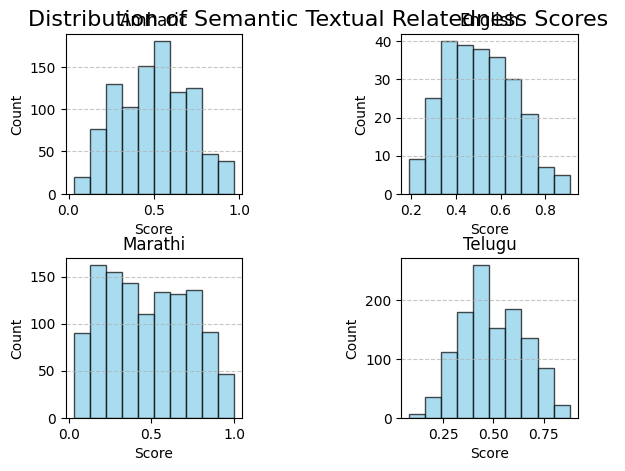

In [122]:
import matplotlib.pyplot as plt

fig = plt.figure()
margin = 0.1

for index, (key, value) in enumerate(datasets.items()):
    plt.subplot(2, 2, index+1)
    plt.hist(value.Score.values, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.subplots_adjust(left=margin, right=1-margin, bottom=margin, top=1-margin, wspace=0.9, hspace=0.4)
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.title(names[key])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set a common title for all subplots with a margin above it
plt.suptitle('Distribution of Semantic Textual Relatedness Scores ', y=0.95, fontsize=16)

plt.show()
